# 대본 전처리 끝낸 df, 전처리 과정 따로 올릴게요

In [8]:
import pandas as pd
df_chat=pd.read_excel('C:/Users/USER/Desktop/플젝/scene1.xlsx')
df_chat2=pd.read_excel('C:/Users/USER/Desktop/플젝/scene2.xlsx')

In [13]:
import requests
# 파파고 스트링 번역

def papago_translate(context):
    try:
        USER_ID = "1rjN3zrT5BjNEDfGVaW9" # 개발자센터에서 발급받은 Client ID 값
        USER_SECRET = "7HmOEBInZY" # 개발자센터에서 발급받은 Client Secret 값
        url = "https://openapi.naver.com/v1/papago/n2mt"
        headers= {"X-Naver-Client-Id": USER_ID, "X-Naver-Client-Secret":USER_SECRET}
        params = {"source": "ko", "target": "en", "text": context}
        response = requests.post(url, headers=headers, data=params)
        res = response.json()
        return res['message']['result']['translatedText']
    except:
        return "PAPAGO_FAILED"

# talk_list 번역
def conv_translate(talk_list):
    translated_list = []
    for i in talk_list:
        new = papago_translate(i)
        translated_list.append(new)
    return translated_list

# scene1- 몽룡,춘향

In [10]:
mongryong=[]
chunhyang=[]
for i in range(0,len(df_chat)):
    if df_chat['name'][i]=='몽룡':
        mongryong.append(df_chat['compound'][i])
    elif df_chat['name'][i]=='춘향':
        chunhyang.append(df_chat['compound'][i])
    else:
        pass    

import numpy as np

In [15]:
name_set=['몽룡','춘향']
chat_for_viewing=df_chat['chat_eng']
print('                                   ###  worst compound-상황1  ####')
for j in name_set:
    
    for i in range(0,len(df_chat)):
        if (df_chat['name'][i]==j) & (df_chat['compound'][i]==np.min(df_chat[df_chat['name']==j])['compound']):
            print('##',j,'compound 지수:',df_chat['compound'][i])
            print(j,':',chat_for_viewing[i])

                                   ###  worst compound-상황1  ####
## 몽룡 compound 지수: -0.7345
몽룡 : It's gone, motherfucker! What's the matter with you, interrupting such an important time?
## 춘향 compound 지수: -0.4951
춘향 : You're a little bad at dancing. (Excuse facial expressions and embroider the head.)


# scene2- 춘향,변사또

In [16]:
chunhyang2=[]
byun2=[]
for i in range(0,len(df_chat2)):
    if df_chat2['name'][i]=='춘향':
        chunhyang2.append(df_chat2['compound'][i])
    elif df_chat2['name'][i]=='사또':
        byun2.append(df_chat2['compound'][i])
    else:
        pass    

In [18]:
name_set2=['춘향','사또']
chat_for_viewing2=df_chat2['chat_eng']

print('                                   ###  worst compound-상황2  ####')
for j in name_set2:
    
    for i in range(0,len(df_chat2)):
        if (df_chat2['name'][i]==j) & (df_chat2['compound'][i]==np.min(df_chat2[df_chat2['name']==j])['compound']):
            print('##',j,'compound 지수:',df_chat2['compound'][i])
            print(j,':',chat_for_viewing2[i])


                                   ###  worst compound-상황2  ####
## 춘향 compound 지수: -0.593
춘향 : Sir, where are you doing now? It's already been three months since we lost contact. My husband, who said he would be back soon if he passed the exam, did you forget about me? My lord!
## 사또 compound 지수: -0.296
사또 : Wait, even if you do this (with a soft accent again), would you refuse to make this Sato request?


# scene1,2 비교

In [40]:
def mean_sent(df,name):
    score=(np.sum(df[(df['labeling']=='SoSo') & (df['name']==name)]['compound'])+\
    np.sum(2*df[(df['labeling']=='Good') & (df['name']==name)]['compound'])+\
    np.sum(2*df[(df['labeling']=='Bad') & (df['name']==name)]['compound']))/len(df[df['name']==name])
    return np.round(score,4)

#가중평균 한것, 감정이 soso일때는 그대로, good,bad일때는 *2 해줌으로써 부정적, 긍정적 감정의 비중을 높임

<Figure size 432x288 with 0 Axes>

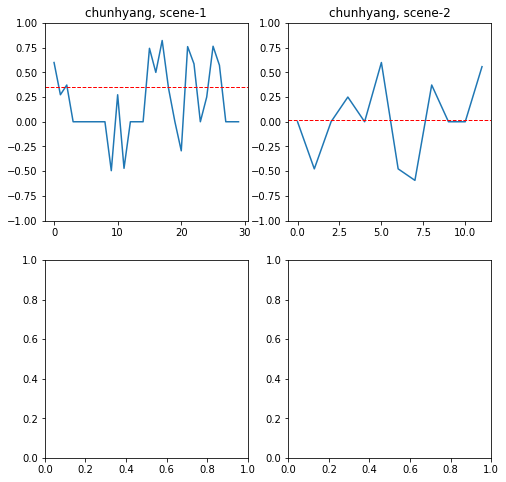

In [42]:
# 상황1,상황2의 춘향 감정변화
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure()
fig,ax_lst=plt.subplots(2,2,figsize=(8,8))


ax_lst[0][0].plot(chunhyang)
ax_lst[0][0].set_title('chunhyang, scene-1')
ax_lst[0][0].set_ylim(-1,1)
ax_lst[0][0].axhline(y=mean_sent(df_chat,'춘향'), color='r', linewidth=1,linestyle='--')
ax_lst[0][1].plot(chunhyang2)
ax_lst[0][1].set_title('chunhyang, scene-2')
ax_lst[0][1].set_ylim(-1,1)
ax_lst[0][1].axhline(y=mean_sent(df_chat2,'춘향'), color='r', linewidth=1,linestyle='--')

#나머지 서브플롯 2개에 몽룡,변사또의 감정추이까지 넣으려 했으나 의미가 없을 것 같아 뺐어요

In [43]:
print('상황 1의 감정평균 # 춘향 :',mean_sent(df_chat,'춘향'))
print('상황 2의 감정평균 # 춘향 :',mean_sent(df_chat2,'춘향'))
print('상황 1의 감정평균 # 몽룡 :',mean_sent(df_chat,'몽룡'))
print('상황 2의 감정평균 # 변사또 :',mean_sent(df_chat2,'사또'))


상황 1의 감정평균 # 춘향 : 0.3561
상황 2의 감정평균 # 춘향 : 0.0179
상황 1의 감정평균 # 몽룡 : 0.217
상황 2의 감정평균 # 변사또 : 0.6386
